# K-Means Clustering on the Iris Dataset
### Task 2 - To Explore Unsupervised Machine Learning

In this task, we will predict the optimum number of clusters in the Iris dataset and represent it visually.

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt

### Loading the Data

In [2]:
from sklearn.datasets import load_iris
iris = load_iris()

X = iris.data

iris_data = pd.DataFrame(X, columns = iris.feature_names)
print("The shape of the dataset is: ", iris_data.shape)
iris_data.head()

The shape of the dataset is:  (150, 4)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### Determining K

For K-Means clustering, we need to know the value of K, i.e. the number of clusters, beforehand. But, how do we determine K? This is where we use something called the **Elbow Method**.

In the Elbow Method, we plot a graph between the number of clusters and the Within-Cluster-Sum-of-Squares (WCSS). 

WCSS can be defined as: 

$$WCSS = \sum_{i=1}^k\sum_{x_j \in C_i} distance(x_j , \mu_{C_i})^2$$
where, \
__*k*__ is the number of clusters. \
$x_j$ represents elements of a cluster $C_i$. \
$\mu_{C_i}$ represents the centroid of a cluster $C_i$.

If we were to take K to be equal to the number of data points, then WCSS would be zero. In such a case, each data point would act as a centroid, making the WCSS zero.

Let's take a look and understand how the Elbow Method works.

In [3]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
   kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 60) # We use k-means++ to avoid the random initialization trap
   kmeans.fit(X)
   wcss.append(kmeans.inertia_)  # kmeans.inertia_ returns the WCSS value for an initialized cluster

Now, let's plot the Elbow Graph.

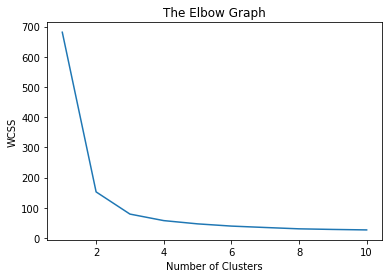

In [4]:
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

From the graph, we can see that with an increase in the number of clusters, the WCSS value decreases. We select the value for K on the basis of the rate of decrease in WCSS. The optimal number of clusters is where the elbow occurs. In the above graph, we see a huge drop in WCSS before 3. After 3, the drop is minimal. Therefore, the optimal number of clusters is 3, i.e. K = 3.

### Training the Algorithm

In [5]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 60)
y = kmeans.fit_predict(X)

### Visualising the Clusters

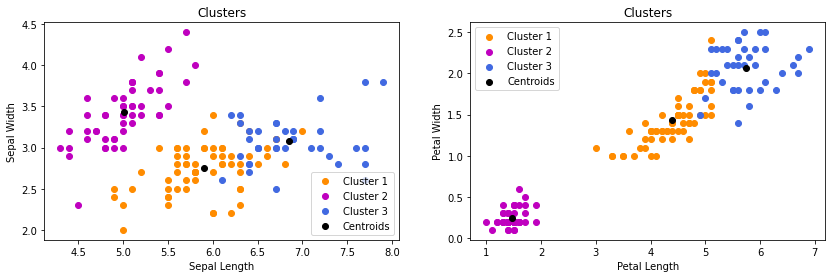

In [6]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,4))

# Sepal Length vs. Sepal Width
ax1.scatter(X[y == 0, 0], X[y == 0, 1], c = 'darkorange', label = 'Cluster 1' )
ax1.scatter(X[y == 1, 0], X[y == 1, 1], c = 'm', label = 'Cluster 2' )
ax1.scatter(X[y == 2, 0], X[y == 2, 1], c = 'royalblue', label = 'Cluster 3' )

centers = kmeans.cluster_centers_
ax1.scatter(centers[:, 0], centers[:, 1], c='black', label = 'Centroids')

ax1.title.set_text('Clusters')
ax1.set_xlabel('Sepal Length')
ax1.set_ylabel('Sepal Width')
ax1.legend()

# Petal Length vs. Petal Width
ax2.scatter(X[y == 0, 2], X[y == 0, 3], c = 'darkorange', label = 'Cluster 1' )
ax2.scatter(X[y == 1, 2], X[y == 1, 3], c = 'm', label = 'Cluster 2' )
ax2.scatter(X[y == 2, 2], X[y == 2, 3], c = 'royalblue', label = 'Cluster 3' )

centers = kmeans.cluster_centers_
ax2.scatter(centers[:, 2], centers[:, 3], c='black', label = 'Centroids')

ax2.title.set_text('Clusters')
ax2.set_xlabel('Petal Length')
ax2.set_ylabel('Petal Width')
ax2.legend()

plt.show()

With this, we have been successful in performing K-means Clustering on the Iris dataset!

Note that we have plotted 2D graphs for sepals and petals individually, for ease of visualization, because a 4D scatter plot would be hard to visualize.